# Weather Conditions in World War Two: 

## Is there a relationship between the daily minimum and maximum temperature? Can you predict the maximum temperature given the minimum temperature?

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [60]:
data=pd.read_csv('C:\\Users\\Ankitude\PracticeProjects\ML_1\LinearRegression\LR4\dataset\Summary_of_Weather.csv',low_memory=False,parse_dates=["Date"])

In [61]:
data.info()
len(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
STA            119040 non-null int64
Date           119040 non-null datetime64[ns]
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117877 non-null object
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null

31

In [67]:
#Identifying the Null values 
data.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
PGT            118515
TSHDSBRSGF      84803
dtype: int64

### So our Independent Variable(X) will be MinTemp and Dependent variable will be MaxTemp(Y)


In [63]:
data=data.dropna(axis=1, how='all', thresh=None, subset=None, inplace=False)

len(data.columns)
        

22

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 22 columns):
STA            119040 non-null int64
Date           119040 non-null datetime64[ns]
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117877 non-null object
SND            5563 non-null float64
PGT            525 non-null float64
TSHDSBRSGF     34237 non-null object
dtypes: datetime64[ns](1), float64(11), int64(4), obje

In [65]:
data[:].nunique()

STA             159
Date           2192
Precip          540
WindGustSpd      30
MaxTemp         149
MinTemp         132
MeanTemp        136
Snowfall         35
PoorWeather      38
YR                6
MO               12
DA               31
PRCP            540
DR               26
SPD              30
MAX             149
MIN             132
MEA             136
SNF              35
SND               1
PGT             179
TSHDSBRSGF       38
dtype: int64

(array([49680., 11015.,  5293., 29406.,  2074.,  8010.,  1217.,  1460.,
            0., 10885.]),
 array([10001. , 17251.5, 24502. , 31752.5, 39003. , 46253.5, 53504. ,
        60754.5, 68005. , 75255.5, 82506. ]),
 <a list of 10 Patch objects>)

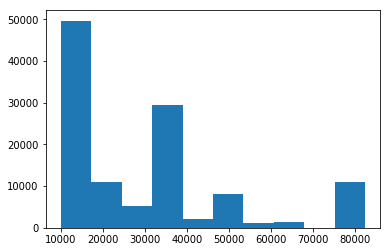

In [66]:
counts, bins = np.histogram(data['STA'])
plt.hist(bins[:-1], bins, weights=counts)

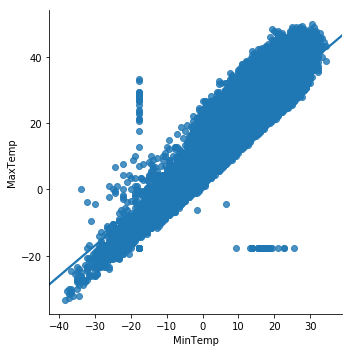

In [69]:
#Visualizing the Linear Regregression Line
sns.lmplot(x='MinTemp',y='MaxTemp',data=data)
plt.show()

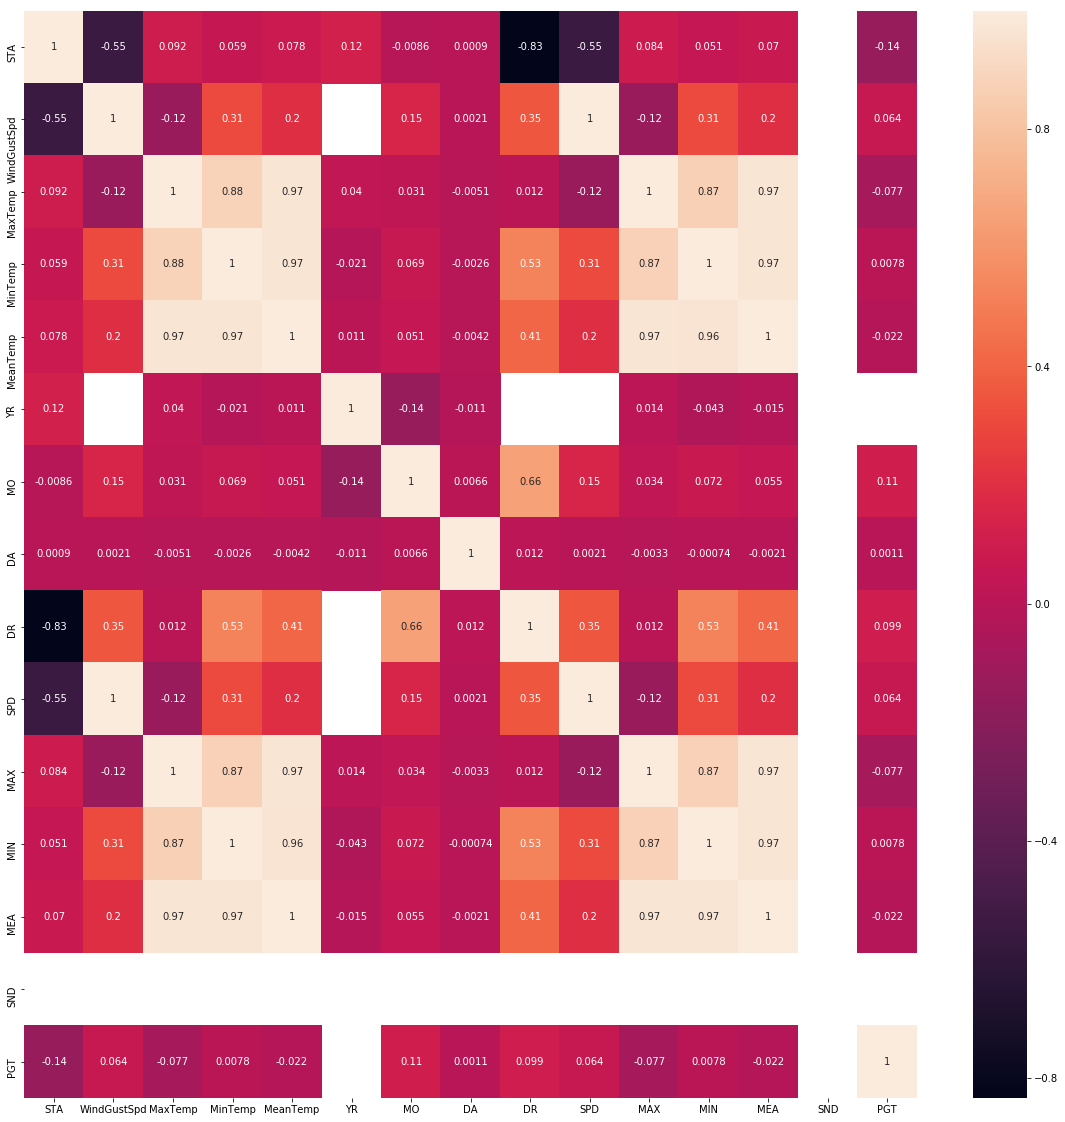

In [71]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

In [73]:
data['MinTemp'].corr(data['MaxTemp'])

0.8783839059497572

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [77]:
xtrain,xtest,ytrain,ytest = train_test_split(data[['MinTemp']],data[['MaxTemp']],
                                             test_size = 0.30,
                                            random_state = 123)

In [79]:
xtrain.size

83328

In [88]:
xtest.size

35712

In [91]:
lr = LinearRegression()

In [92]:
lr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
ypred = lr.predict(xtest)

In [96]:
ypred

array([[14.7953037 ],
       [30.09840852],
       [19.38623515],
       ...,
       [-3.5684221 ],
       [30.09840852],
       [29.07820154]])

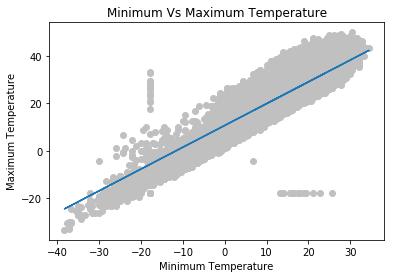

In [101]:
plt.scatter(xtrain,ytrain, color='silver')
plt.plot(xtrain,lr.predict(xtrain))
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')
plt.title('Minimum Vs Maximum Temperature')
plt.show()

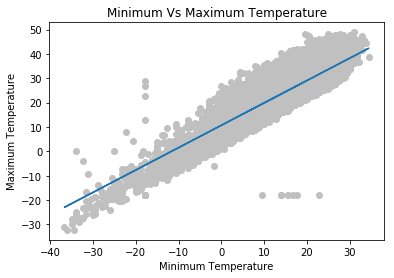

In [102]:
plt.scatter(xtest,ytest, color='silver')
plt.plot(xtest,lr.predict(xtest))
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')
plt.title('Minimum Vs Maximum Temperature')
plt.show()

In [109]:
from sklearn.metrics import r2_score, mean_squared_error

### So the accuracy of the model is nearly 77%

In [108]:
r2_score(ytest,ypred)

0.773339637432801

### Conclusion - The below value represents that our predicted temperature is 4.13 degrees away from the actual temperature.

In [107]:
np.sqrt(mean_squared_error(ytest,ypred)) 

4.134436592076651